In [1]:
import mg5qs_import as qs
from pathlib import Path
import os
import numpy as np 
import matplotlib.pyplot as plt

### Vary parameters using API and visual editing tools

This example will demonstrate how MadGraph's built-in capabilities to edit model and run parameters are carried over into mg5qs.

This example includes:
- use of visual card editor
- use of API for editing model parameters
- looping over model parmeters
- 

### 1. Generate a MadGraph framework and use visual card editor

**1.1 Create MadGraph framework and edit run_card**

The visual card editor uses IPyWidgets (native to Jupyter) to edit cards, it is essentially a replacement for vi/gedit/nano/etc. command line file editors. 

In [2]:
# edit proc_card before using it to generate framework 
qs.edit_card_spec(qs.INPUT_PATH / 'proc_card.dat')
# try changing the output name, currently 'EXAMPLE'

#************************************************************
#*                        MadGraph 5                        *
#*                                                          *
#*                *                       *                 *
#*                  *        * *        *                   *
#*                    * * * * 5 * * * *                     *
#*                  *        * *        *                   *
#*                *                       *                 *
#*                                                          *
#*                                                          *
#*    The MadGraph Development Team - Please visit us at    *
#*    https://server06.fynu.ucl.ac.be/projects/madgraph     *
#*                                                          *
#************************************************************
#*                                                          *
#*               Command File for MadGraph 5                *
#*      

Text(value='import model sm', layout=Layout(width='550px'))

# Define multiparticle labels


Text(value='define p = g u c d s u~ c~ d~ s~', layout=Layout(width='550px'))

Text(value='define j = g u c d s u~ c~ d~ s~', layout=Layout(width='550px'))

Text(value='define l+ = e+ mu+', layout=Layout(width='550px'))

Text(value='define l- = e- mu-', layout=Layout(width='550px'))

Text(value='define vl = ve vm vt', layout=Layout(width='550px'))

Text(value='define vl~ = ve~ vm~ vt~', layout=Layout(width='550px'))

# Specify process(es) to run


Text(value='generate p p > e- ve~ @1', layout=Layout(width='550px'))

Text(value='add process p p > e- ve~ j @2', layout=Layout(width='550px'))

Text(value='add process p p > t t~ @3', layout=Layout(width='550px'))

# Output processes to MadEvent directory


Text(value='output EXAMPLE', layout=Layout(width='550px'))

# This will create a directory PROC_$MODELNAME_$X
# If you want to specify the path/name of the directory use
# output /path/to/output
# When finished editing, press the save button below


Button(description='Save', style=ButtonStyle())

Output()

In [3]:
# generate framework 
output_name, FRAMEWORK_PATH = qs.run_MG5(qs.MG5_PATH, qs.INPUT_PATH, proc_card_name='proc_card.dat')

**1.2 change run parmeters by editing run_card generated allong with the framework**

Each new framework is created with a number of cards (see FRAMEWORK_PATH/Cards). The run_card contains: number of events, random seed, and many more runtime parameters. 

In [4]:
qs.edit_card(FRAMEWORK_PATH) # by default, edit_card will chose the run_card

#*********************************************************************
#                       MadGraph5_aMC@NLO                            *
#                                                                    *
#                     run_card.dat MadEvent                          *
#                                                                    *
#  This file is used to set the parameters of the run.               *
#                                                                    *
#  Some notation/conventions:                                        *
#                                                                    *
#   Lines starting with a '# ' are info or comments                  *
#                                                                    *
#   mind the format:   value    = variable     ! comment             *
#                                                                    *
#   To display more options, you can type the command:               *
#     

Text(value='tag_1     = run_tag ! name of the run', layout=Layout(width='550px'))

#*********************************************************************
# Number of events and rnd seed                                      *
# Warning: Do not generate more than 1M events in a single run       *
#*********************************************************************


Text(value='10000 = nevents ! Number of unweighted events requested', layout=Layout(width='550px'))

Text(value='0   = iseed   ! rnd seed (0=assigned automatically=default))', layout=Layout(width='550px'))

#*********************************************************************
# Collider type and energy                                           *
# lpp: 0=No PDF, 1=proton, -1=antiproton,                            *
#                2=elastic photon of proton/ion beam                 *
#             +/-3=PDF of electron/positron beam                     *
#             +/-4=PDF of muon/antimuon beam                         *
#*********************************************************************


Text(value='1        = lpp1    ! beam 1 type', layout=Layout(width='550px'))

Text(value='1        = lpp2    ! beam 2 type', layout=Layout(width='550px'))

Text(value='6500.0     = ebeam1  ! beam 1 total energy in GeV', layout=Layout(width='550px'))

Text(value='6500.0     = ebeam2  ! beam 2 total energy in GeV', layout=Layout(width='550px'))

# To see polarised beam options: type "update beam_pol"

#*********************************************************************
# PDF CHOICE: this automatically fixes alpha_s and its evol.         *
# pdlabel: lhapdf=LHAPDF (installation needed) [1412.7420]           *
#          iww=Improved Weizsaecker-Williams Approx.[hep-ph/9310350] *
#          eva=Effective W/Z/A Approx.       [2111.02442]            *
#          edff=EDFF in gamma-UPC            [eq.(11) in 2207.03012] *
#          chff=ChFF in gamma-UPC            [eq.(13) in 2207.03012] *
#          none=No PDF, same as lhapdf with lppx=0                   *
#*********************************************************************


Text(value='nn23lo1    = pdlabel     ! PDF set', layout=Layout(width='550px'))

Text(value='230000    = lhaid     ! if pdlabel=lhapdf, this is the lhapdf number', layout=Layout(width='550px'…

# To see heavy ion options: type "update ion_pdf"
#*********************************************************************
# Renormalization and factorization scales                           *
#*********************************************************************


Text(value='False = fixed_ren_scale  ! if .true. use fixed ren scale', layout=Layout(width='550px'))

Text(value='False = fixed_fac_scale  ! if .true. use fixed fac scale', layout=Layout(width='550px'))

Text(value='91.188  = scale            ! fixed ren scale', layout=Layout(width='550px'))

Text(value='91.188  = dsqrt_q2fact1    ! fixed fact scale for pdf1', layout=Layout(width='550px'))

Text(value='91.188  = dsqrt_q2fact2    ! fixed fact scale for pdf2', layout=Layout(width='550px'))

Text(value='-1 = dynamical_scale_choice ! Choose one of the preselected dynamical choices', layout=Layout(widt…

Text(value='1.0  = scalefact        ! scale factor for event-by-event scales', layout=Layout(width='550px'))



#*********************************************************************
# Type and output format
#*********************************************************************


Text(value='False     = gridpack  !True = setting up the grid pack', layout=Layout(width='550px'))

Text(value='-1.0 = time_of_flight ! threshold (in mm) below which the invariant livetime is not written (-1 me…

Text(value='average =  event_norm       ! average/sum. Normalization of the weight in the LHEF', layout=Layout…

# To see MLM/CKKW  merging options: type "update MLM" or "update CKKW"

#*********************************************************************
#
#*********************************************************************
# Phase-Space Optimization strategy (basic options)
#*********************************************************************


Text(value='0  = nhel          ! using helicities importance sampling or not.', layout=Layout(width='550px'))

Text(value='! 0: sum over helicity, 1: importance sampling', layout=Layout(width='550px'))

Text(value='1  = sde_strategy  ! default integration strategy (hep-ph/2021.00773)', layout=Layout(width='550px…

Text(value='! 1 is old strategy (using amp square)', layout=Layout(width='550px'))

Text(value='! 2 is new strategy (using only the denominator)', layout=Layout(width='550px'))

# To see advanced option for Phase-Space optimization: type "update psoptim"
#*********************************************************************
# Customization (custom cuts/scale/bias/...)                         *
# list of files containing fortran function that overwrite default   *
#*********************************************************************


Text(value='= custom_fcts ! List of files containing user hook function', layout=Layout(width='550px'))

#*******************************
# Parton level cuts definition *
#*******************************


Text(value='0.0  = dsqrt_shat ! minimal shat for full process', layout=Layout(width='550px'))

#
#
#*********************************************************************
# BW cutoff (M+/-bwcutoff*Gamma) ! Define on/off-shell for "$" and decay
#*********************************************************************


Text(value='15.0  = bwcutoff      ! (M+/-bwcutoff*Gamma)', layout=Layout(width='550px'))

#*********************************************************************
# Standard Cuts                                                      *
#*********************************************************************
# Minimum and maximum pt's (for max, -1 means no cut)                *
#*********************************************************************


Text(value='20.0  = ptj       ! minimum pt for the jets', layout=Layout(width='550px'))

Text(value='10.0  = ptl       ! minimum pt for the charged leptons', layout=Layout(width='550px'))

Text(value="0.0  = misset    ! minimum missing Et (sum of neutrino's momenta)", layout=Layout(width='550px'))

Text(value='-1.0  = ptjmax    ! maximum pt for the jets', layout=Layout(width='550px'))

Text(value='-1.0  = ptlmax    ! maximum pt for the charged leptons', layout=Layout(width='550px'))

Text(value="-1.0  = missetmax ! maximum missing Et (sum of neutrino's momenta)", layout=Layout(width='550px'))

Text(value='{} = pt_min_pdg ! pt cut for other particles (use pdg code). Applied on particle and anti-particle…

Text(value='{}\t= pt_max_pdg ! pt cut for other particles (syntax e.g. {6: 100, 25: 50})', layout=Layout(width…

#
# For display option for energy cut in the partonic center of mass frame type 'update ecut'
#
#*********************************************************************
# Maximum and minimum absolute rapidity (for max, -1 means no cut)   *
#*********************************************************************


Text(value='5.0 = etaj    ! max rap for the jets', layout=Layout(width='550px'))

Text(value='2.5  = etal    ! max rap for the charged leptons', layout=Layout(width='550px'))

Text(value='0.0  = etalmin ! min rap for the charged leptons', layout=Layout(width='550px'))

Text(value='{} = eta_min_pdg ! rap cut for other particles (use pdg code). Applied on particle and anti-partic…

Text(value='{} = eta_max_pdg ! rap cut for other particles (syntax e.g. {6: 2.5, 23: 5})', layout=Layout(width…

#*********************************************************************
# Minimum and maximum DeltaR distance                                *
#*********************************************************************


Text(value='0.4 = drjl    ! min distance between jet and lepton', layout=Layout(width='550px'))

Text(value='-1.0  = drjlmax ! max distance between jet and lepton', layout=Layout(width='550px'))

#*********************************************************************
# Minimum and maximum invariant mass for pairs                       *
#*********************************************************************


Text(value='{} = mxx_min_pdg ! min invariant mass of a pair of particles X/X~ (e.g. {6:250})', layout=Layout(w…

Text(value="{'default': False} = mxx_only_part_antipart ! if True the invariant mass is applied only", layout=…

Text(value='! to pairs of particle/antiparticle and not to pairs of the same pdg codes.', layout=Layout(width=…

#*********************************************************************
# Minimum and maximum invariant mass for all letpons                 *
#*********************************************************************


Text(value='0.0   = mmnl    ! min invariant mass for all letpons (l+- and vl)', layout=Layout(width='550px'))

Text(value='-1.0  = mmnlmax ! max invariant mass for all letpons (l+- and vl)', layout=Layout(width='550px'))

#*********************************************************************
# Minimum and maximum pt for 4-momenta sum of leptons / neutrino     *
#  for pair of lepton includes only same flavor, opposite charge
#*********************************************************************
#*********************************************************************
# Inclusive cuts                                                     *
#*********************************************************************


Text(value='0.0  = ptheavy   ! minimum pt for at least one heavy final state', layout=Layout(width='550px'))

#*********************************************************************
# maximal pdg code for quark to be considered as a light jet         *
# (otherwise b cuts are applied)                                     *
#*********************************************************************


Text(value='4 = maxjetflavor    ! Maximum jet pdg code', layout=Layout(width='550px'))

#*********************************************************************
#
#*********************************************************************
# Store info for systematics studies                                 *
# WARNING: Do not use for interference type of computation           *
#*********************************************************************


Text(value='True  = use_syst      ! Enable systematics studies', layout=Layout(width='550px'))

#


Text(value='systematics = systematics_program ! none, systematics [python], SysCalc [depreceted, C++]', layout…

Text(value="['--mur=0.5,1,2', '--muf=0.5,1,2', '--pdf=errorset'] = systematics_arguments ! see: https://cp3.ir…

Button(description='Save', style=ButtonStyle())

Output()

**1.3 load param_card using API and change a value**

The param_card can be edited using the visual editor, but it is often preferred to use the API since values can be changed without manual input. Also, some parmeter cards have hundreds or even thousands of lines, so the visual editor is cumbersome. Using the API allows LHE generation to be performed in a loop which changes one or more parameters each time.

In [5]:
# load param card and look at contents 
card = qs.ParamCard(FRAMEWORK_PATH)
card

Abstract of Parameter Card
  /home/leo/MadStats/mg5qs/output/EXAMPLE/Cards/param_card.dat
    BLOCKS:
      MASS (17)
      SMINPUTS (3)
      YUKAWA (3)
    DECAY (17)

In [6]:
# the ParamCard object stores a dictionary of pandas dataframes
card.dfs().keys() # view keys

dict_keys(['DECAY', 'MASS', 'SMINPUTS', 'YUKAWA'])

In [7]:
# to find a specifc value, look at a particular dataframe
df_mass = card.dfs()['MASS']
df_mass # notice the key ascocated with Higgs mass is 25

,key,value,comment
0,5,4.700,MB
1,6,173.000,MT
2,15,1.777,MTA
3,23,91.188,MZ
4,25,125.000,MH
5,1,0.000,d : 0.0
6,2,0.000,u : 0.0
7,3,0.000,s : 0.0
8,4,0.000,c : 0.0
9,11,0.000,e- : 0.0


For longer param_cards, search by parameter name this way:

In [8]:
# this is the standard way of searching a pandas dataframe
df_mass[df_mass['comment'].str.startswith('MH')]

,key,value,comment
4,25,125.0,MH


In [9]:
# call set_value using the block name and key
new_MH = 42
card.set_value('MASS', 25, new_MH)
# reload dataframe and check change 
df_mass = card.dfs()['MASS']
df_mass[df_mass['comment'].str.startswith('MH')]

,key,value,comment
4,25,42.0,MH


### 2. Generate LHEs with altered parameters

**2.1 write a loop that changes a parameter value and generates LHEs**

In [10]:
# loop over values for the Higgs mass and generate LHEs 
for MH in np.linspace(75, 175, 5):
    card.set_value('MASS', 25, MH)  # set the new value 
    print('Working on MH =', MH, '...')
    qs.generate_LHE(card, FRAMEWORK_PATH) # generate LHE with current Higgs mass
print('Done')

Working on MH = 75.0 ...
Working on MH = 100.0 ...
Working on MH = 125.0 ...
Working on MH = 150.0 ...
Working on MH = 175.0 ...
Done


### 3. Generate transverse momenta

**3.1 get LHEs**

In [11]:
LHEs = qs.get_LHEs(FRAMEWORK_PATH)

**3.2 call pT_particle using multithreading**

In [20]:
import concurrent.futures
cpu_cores = 10  # set an appropriate value based on CPU hardware
results = {}

def process_LHE(LHE, PID=15):
    result =  qs.generate_pT(PID, LHE)
    return LHE.parent.name, result

with concurrent.futures.ProcessPoolExecutor(max_workers=cpu_cores) as executor:
    futures = {executor.submit(process_LHE, LHE): LHE for LHE in LHEs}
    for future in concurrent.futures.as_completed(futures):
        name, result = future.result()
        results[name] = result  


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.311      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change:  8 Mar 2024  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 04 Sep 2024 at 19:00:59    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

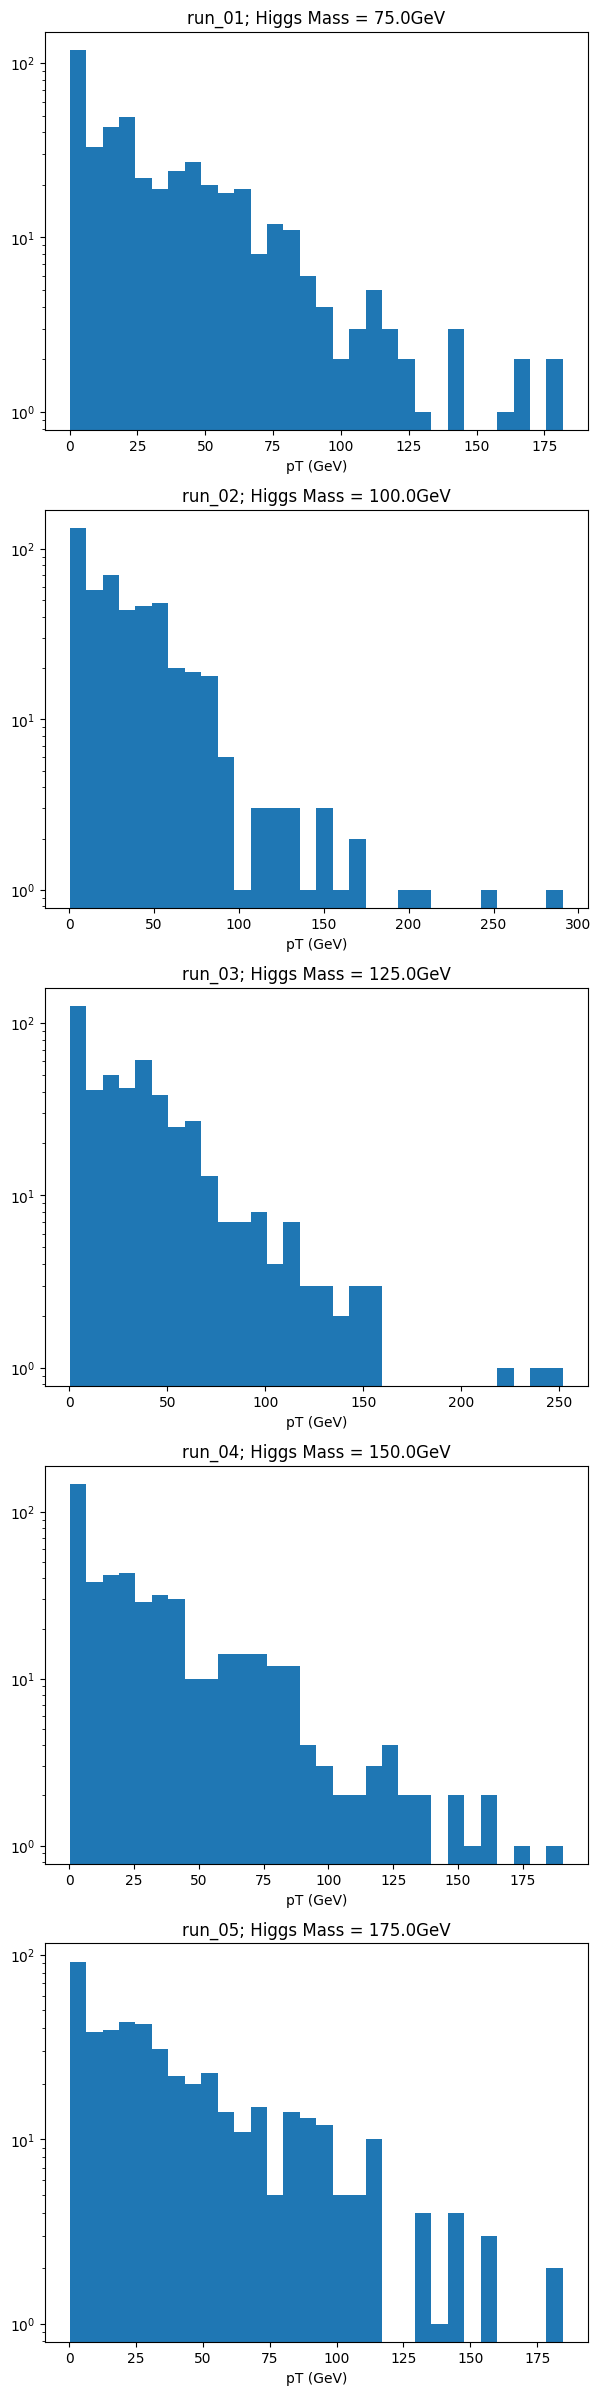

In [32]:
fig, ax = plt.subplots(len(results), figsize=(7, len(results)*6))

ks = np.sort([key for key in results.keys()]) # construct sorted list of keys 
MH = np.linspace(75, 175, 5)

for i, k in enumerate(ks):
    ax[i].hist(results[k][1], bins=30)
    ax[i].set_title(k+'; Higgs Mass = '+str(MH[i])+'GeV')
    ax[i].set_yscale('log')
    ax[i].set_xlabel("pT (GeV)")
plt.show()